In [35]:
import os
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

def read_csv_files(directories):
    """
    Read all of the CSV files in the specified directories.

    Args:
        directories: A comma-separated string of directories that contain the CSV files.

    Returns:
        A list of DataFrames, one for each CSV file.
    """

    dataframes = []
    for directory in directories.split(','):
        csv_files = os.listdir(directory.strip())
        for csv_file in csv_files:
            if csv_file.lower().endswith('.csv'):
                dataframe = pd.read_csv(os.path.join(directory.strip(), csv_file))
                dataframes.append(dataframe)

    return dataframes

def train_rul_model(X_train, y_train):
    """
    Train a Random Forest Regressor model on the given data.

    Args:
        X_train: The feature matrix for training.
        y_train: The target variable vector for training.

    Returns:
        The trained Random Forest Regressor model.
    """

    # Create and train the Random Forest Regressor
    rul_model = RandomForestRegressor(random_state=42)
    rul_model.fit(X_train, y_train)

    return rul_model

def main():
    # Get the list of CSV files in the directory
    directory = "/content/drive/MyDrive/fsm/Learning_set/Bearing3_1,/content/drive/MyDrive/fsm/Learning_set/Bearing3_2"
    csv_files = read_csv_files(directory)

    # Loop over the CSV files and train a model on each one
    for data in csv_files:
        # Print column names to find the correct name of the target variable (RUL) column
        print(data.columns)

        # Assume the target variable is in the last column (index -1)
        target_column_index = -1
        X = data.drop(data.columns[target_column_index], axis=1)
        y = data[data.columns[target_column_index]]

        # Initialize the imputer with the desired strategy (e.g., mean, median, most frequent)
        imputer = SimpleImputer(strategy='mean')

        # Fit the imputer on the data and transform
        X_imputed = imputer.fit_transform(X)

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

        # Train the RUL prediction model and get the trained model
        rul_model = train_rul_model(X_train, y_train)

        # Evaluate the model's performance on the test set (e.g., using R-squared score)
        score = rul_model.score(X_test, y_test)
        print("R-squared score:", score)

if __name__ == "__main__":
    main()


Index(['10', '8', '9', '1.1879e+05', '-0.005', '0.291'], dtype='object')
R-squared score: -0.04100844585981145
Index(['9', '28', '29', '1.1879e+05', '-0.063', '-0.521'], dtype='object')
R-squared score: -0.1417199709710768
Index(['9', '17', '29', '1.1879e+05', '0.08', '0.339'], dtype='object')
R-squared score: 0.019711695065284474
Index(['9', '26', '49', '1.1879e+05', '-0.072', '-0.192'], dtype='object')
R-squared score: -0.15471262440757516
Index(['9', '30', '59', '1.1879e+05', '-0.252', '-0.302'], dtype='object')
R-squared score: -0.08596208625792578
Index(['9', '15', '19', '1.1879e+05', '-0.147', '0.488'], dtype='object')
R-squared score: -0.03587679662617704
Index(['9', '12', '19', '1.1879e+05', '0.347', '0.23'], dtype='object')
R-squared score: 0.04505006772160991
Index(['9', '11', '19', '1.1879e+05', '0.059', '-0.372'], dtype='object')
R-squared score: -0.12109591788190532
Index(['10', '13', '9', '1.1879e+05', '-0.258', '0.364'], dtype='object')
R-squared score: -0.20177012249126

Index(['10', '19', '11', '6.1879e+05', '0.172', '-0.033', 'Predicted RUL',
       'True RUL', 'Cycle'],
      dtype='object')
R-squared score: 0.9999983122994599


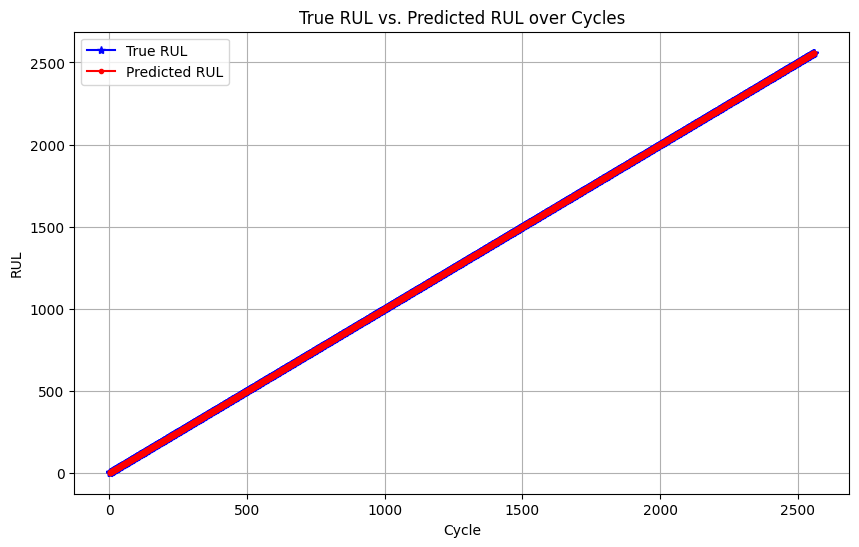

In [47]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

def read_csv_files(directories):
    """
    Read all of the CSV files in the specified directories.

    Args:
        directories: A list of directories, each containing CSV files.

    Returns:
        A dictionary of DataFrames, where keys are the directories and values are the corresponding DataFrames.
    """

    dataframes = {}
    for directory in directories:
        csv_files = os.listdir(directory)
        dfs = []
        for csv_file in csv_files:
            dataframe = pd.read_csv(os.path.join(directory, csv_file))
            dfs.append(dataframe)
        dataframes[directory] = dfs

    return dataframes
def plot_rul_prediction_log(data):
    """
    Plot the RUL predictions against the true RUL values over cycles on a logarithmic scale.

    Args:
        data: DataFrame containing the predicted and true RUL values.
    """

    plt.figure(figsize=(10, 6))

    # Create a new column 'Cycle' representing the cycle number for each row
    data['Cycle'] = range(1, len(data) + 1)

    # Plot True RUL and Predicted RUL over cycles on a logarithmic scale
    plt.yscale('log')
    plt.plot(data['Cycle'], data['True RUL'], color='blue', label='True RUL')
    plt.plot(data['Cycle'], data['Predicted RUL'], color='red', label='Predicted RUL')

    plt.xlabel('Cycle')
    plt.ylabel('RUL')
    plt.title('True RUL vs. Predicted RUL over Cycles')
    plt.legend()
    plt.grid(True)
    plt.show()


def train_main():
    # List of directories containing the CSV files for each bearing set
    directories = [
        "/content/drive/MyDrive/fsm/Test_set/Bearing3_3"]
    dataframes_dict = read_csv_files(directories)

    # Loop over the CSV files and train a model on each one
    for directory, dataframes in dataframes_dict.items():
        for i, dataframe in enumerate(dataframes):
            # Process each DataFrame, such as preprocessing, model training, etc.
            # Use 'directory' variable to keep track of the current bearing set.
            pass

        # Print column names to find the correct name of the target variable (RUL) column
        print(data.columns)

        # Assume the target variable is in the last column (index -1)
        target_column_index = -1
        X = data.drop(data.columns[target_column_index], axis=1)
        y = data[data.columns[target_column_index]]

        # Initialize the imputer with the desired strategy (e.g., mean, median, most frequent)
        imputer = SimpleImputer(strategy='mean')

        # Fit the imputer on the data and transform
        X_imputed = imputer.fit_transform(X)

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

        # Train the RUL prediction model
        rul_model = train_rul_model(X_train, y_train)

        # Evaluate the model's performance on the test set (e.g., using mean squared error)
        score = rul_model.score(X_test, y_test)
        print("R-squared score:", score)

        # Add the predicted RUL values to the DataFrame
        data['Predicted RUL'] = rul_model.predict(X_imputed)
        data['True RUL'] = y

    return data

if __name__ == "__main__":
    data = train_main()
    plot_rul_prediction(data)

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
print(data.columns)


Index(['10', '19', '11', '6.1879e+05', '0.172', '-0.033', 'Predicted RUL',
       'True RUL', 'Cycle'],
      dtype='object')


In [49]:
print(data.head(25))


    10  19  11  6.1879e+05  0.172  -0.033  Predicted RUL  True RUL  Cycle
0   10  19  11    618830.0  0.133  -0.092           1.99         1      1
1   10  19  11    618870.0 -0.242  -0.178           2.24         2      2
2   10  19  11    618910.0 -0.040  -0.282           2.88         3      3
3   10  19  11    618940.0 -0.314   0.625           3.91         4      4
4   10  19  11    618980.0 -0.015  -0.107           5.02         5      5
5   10  19  11    619020.0  0.323  -0.159           6.00         6      6
6   10  19  11    619060.0 -0.003   0.026           6.84         7      7
7   10  19  11    619100.0  0.154  -0.039           7.80         8      8
8   10  19  11    619140.0 -0.014  -0.166           8.65         9      9
9   10  19  11    619180.0  0.227  -0.337           9.82        10     10
10  10  19  11    619220.0  0.077   0.418          11.12        11     11
11  10  19  11    619260.0  0.077  -0.149          11.94        12     12
12  10  19  11    619300.0 -0.179  -0.